In [1]:
import numpy as np
import tweepy as tw
import time
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from itertools import islice 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
scope = ['https://www.googleapis.com/auth/spreadsheets', 'https://www.googleapis.com/auth/drive.file',
             "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)
client = gspread.authorize(creds)
sheet1 = client.open('TT_dep_federais_DB').worksheet("DB")
sheet2 = client.open('TT_dep_federais_Dim').worksheet("Deputados_Federais")

In [14]:
# PEGANDO DADOS QUE ACABEI DE ADD
sheetopen = client.open("TT_dep_federais_DB").sheet1
list_of_hashes = sheetopen.get_all_records()

sheetopen2 = client.open("TT_dep_federais_Dim").sheet1
list_of_dep = sheetopen2.get_all_records()


In [15]:
print(list_of_hashes)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
df1 = pd.DataFrame(list_of_hashes)

In [17]:
print(df1)

                Twitter                                              Texto  \
0          @charllesevg  RT @Metropoles: As polícias civis dos 26 estad...   
1      @Charles_Federal  No #TBT de hoje, nosso compromisso firmado em ...   
2       @depcelsosabino  Mais um assalto com reféns  a um banco aterror...   
3      @celsorussomanno  Lembram desse caso do Patrulha? #TBT.\n\nDeixe...   
4       @maldaner_celso  Aprovado o texto sem alterações. Agora a MP se...   
...                 ...                                                ...   
26813    @chico_dangelo         Viva Paulo Freire! https://t.co/r1ujvoDFol   
26814      @danielPMERJ  @NegoGiaco Acha que somente negros foram escra...   
26815     @CelioStudart  #aniversariosus \nSUS: Comemoro o esforço dos ...   
26816     @CelioMouraTO  A proposta é ampliar o Bolsa Família para asse...   
26817   @maldaner_celso  @Calmanoella @johncsilva @_oisouAilton @Stefan...   

       Cont.RT  Cont.Like        Data      Hora  
0            

In [18]:
print(list_of_dep)

[{'Twitter': '@abou_anni', 'Nome': 'Abou Anni', 'Link_Wikipedia (Deputado)': 'Abou Anni', 'Partido': 'PSL', 'Link_Wikipedia (Partido)': 'PSL', 'Coligação': 'PSL', 'Votos nominais': 69.256, 'Nota': '', 'Estado': 'SÃO PAULO', 'Sigla Estado': 'SP', 'Estado PBI': 'SÃO PAULO, BRAZIL', 'LinkTransparencia': 'https://www.camara.leg.br/deputados/204521', 'Código-LinkTransparencia': 204521, 'LinkTransparenciaMês': 'https://www.camara.leg.br/cota-parlamentar/index.jsp?deputadosSelecionados=3413&dataInicio=01/2020&dataFim=12/2020&despesa=todas&pesquisar=sim&cnpjFornecedor=', 'Código-LinkTransparenciaMês': 3413, 'Comentário-LinkTransparencia': ''}, {'Twitter': '@AcacioFavacho', 'Nome': 'Acácio Favacho', 'Link_Wikipedia (Deputado)': 'Acácio Favacho', 'Partido': 'PROS', 'Link_Wikipedia (Partido)': 'PROS', 'Coligação': 'PDT / PCdoB / MDB / PROS', 'Votos nominais': 19.111, 'Nota': '', 'Estado': 'AMAPÁ', 'Sigla Estado': 'AP', 'Estado PBI': 'AMAPÁ, BRAZIL', 'LinkTransparencia': 'https://www.camara.leg.br

In [19]:
df2 = pd.DataFrame(list_of_dep)

In [20]:
print(df2)

             Twitter              Nome Link_Wikipedia (Deputado)  \
0         @abou_anni         Abou Anni                 Abou Anni   
1     @AcacioFavacho    Acácio Favacho            Acácio Favacho   
2      @AdolfoViana_      Adolfo Viana              Adolfo Viana   
3    @adrianasounovo   Adriana Ventura           Adriana Ventura   
4    @adrianodobaldy  Adriano do Baldy          Adriano do Baldy   
..               ...               ...                       ...   
512       @ZeMarioGO          Zé Mário                  Zé Mário   
513       @depzeneto           Zé Neto                   Zé Neto   
514        @ZeSilva_          Zé Silva                  Zé Silva   
515      @zevitor_mg          Zé Vitor                  Zé Vitor   
516     @zeca_dirceu       Zeca Dirceu               Zeca Dirceu   

           Partido Link_Wikipedia (Partido)  \
0              PSL                      PSL   
1             PROS                     PROS   
2             PSDB                     PSD

In [21]:
MergedTable = pd.merge(df1,df2,how='inner',on='Twitter')

In [22]:
byPartido = MergedTable.groupby("Partido").sum().sort_values("Cont.Like", ascending=False)

<AxesSubplot:xlabel='Partido'>

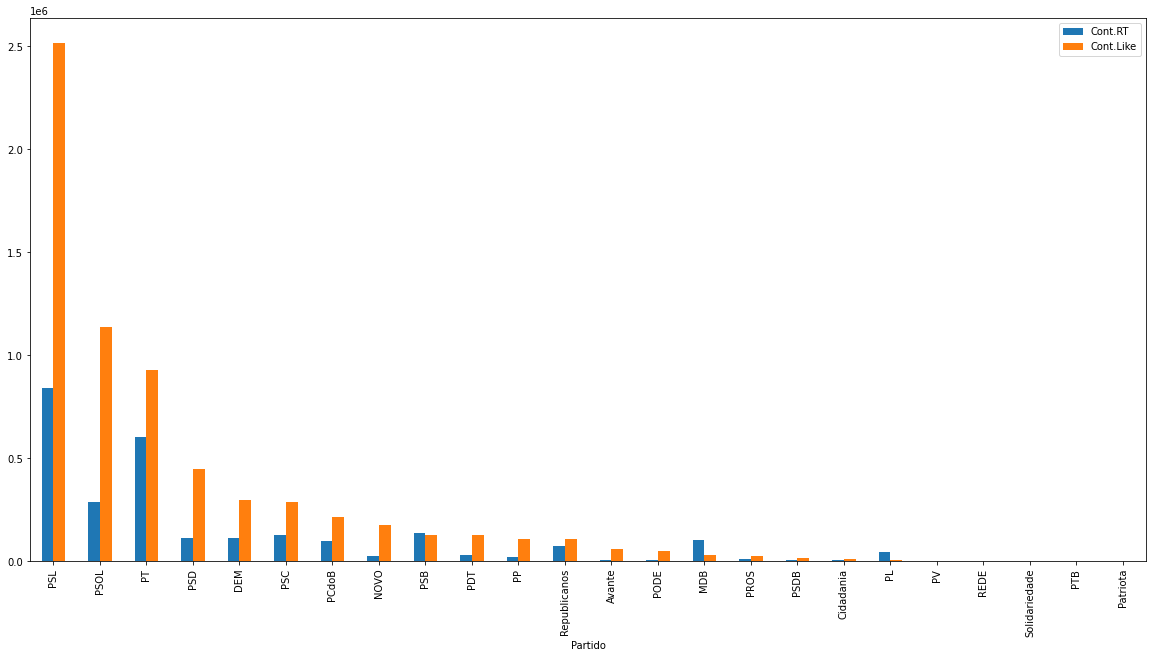

In [23]:
byPartido.plot.bar(figsize=(20,10))

In [24]:
byPartido2 = MergedTable.groupby(["Partido"])['Partido'].transform('count')
byPartido2

0        3120
1        3120
2        3120
3        3120
4        3120
         ... 
26125    7802
26126    7802
26127    7802
26128     510
26129    1522
Name: Partido, Length: 26130, dtype: int64

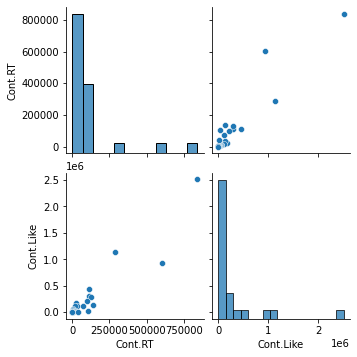

In [25]:
sns.pairplot(byPartido)

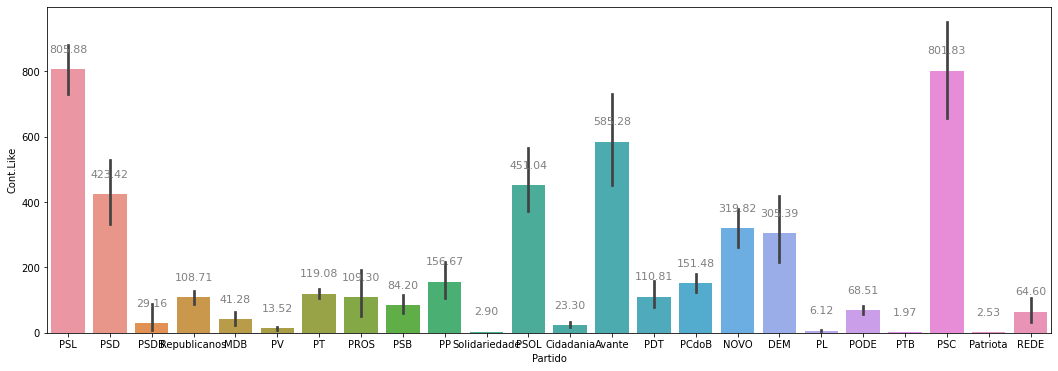

In [26]:
plt.figure(figsize=(18, 6))
g = sns.barplot(x="Partido",y="Cont.Like",data=MergedTable)

ax = g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

In [ ]:
lista = []
for x in list_of_hashes:
    [lista.extend([k, v]) for k, v in x.items()]

words = []
multiplo = 3
for x in range(len(lista)):
    if str(x) == str(multiplo):
        words.append(lista[x].split())
        multiplo += 12

In [ ]:
textofinal = []
for x in range(len(words)):
    for y in range(len(words[x])):
        textofinal.append(words[x][y])

In [ ]:
print(str(textofinal))

In [ ]:
listToStr = ' '.join([str(elem) for elem in textofinal]) 

In [ ]:
print(listToStr)

In [ ]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "RT", "que", "https", "por", "são", "está", "uma", "essa", "vamos"
                 "Vamo", "pela", "minha", "esse", "sua", "isso", "nos", "pelo", "para", "tem", "co", "como", "mai", "hoje",
                 "pra", "já", "tem", "ma", "na", "se", "seu", "eu", "dos", "ser", "nossa", "aos", "só", "aos", "toda", "um", "mas",
                 "Deu", "ele", "suas", ""])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(listToStr)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))

ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("TT_Deputados.png")

In [ ]:
from pandas import DataFrame
from GoogleNews import GoogleNews

googlenews = GoogleNews()
googlenews.search('Bolsonaro')
result = googlenews.result()
column = []
news = []

for n in range(len(result)):
    
    
    for index in result[n]:
        if n %2 == 0:
            news.append(result[n][index])
        else:
            column.append([index])

    exit()
    
print(result)
#print(news)
#print(len(news))
#print(news[0])
#print(column)

#df = DataFrame(news,columns=[column[0],column[1],column[2],column[3],column[4], column[5]])

#df

In [ ]:
from pandas import DataFrame
from GoogleNews import GoogleNews

googlenews = GoogleNews()
googlenews.search("Bolsonaro")
result = googlenews.result()
column = []
news = []
news2 = []

for n in range(len(result)):
    
    
    for index in result[n]:
            news.append(result[n][index])

    exit()
    
print(result)
print(news)

for x in range(len(news)):
    if x %6 == 0:
        news2.append([news[x-6],news[x-5],news[x-4],news[x-3],news[x-2],news[x-1]])
    
#print(len(news))
#print(news[0])
#print(column)

print(news2)

#df = DataFrame(news2,columns=['title','media','date','desc','link', 'img'])

#df

#df.to_excel("output.xlsx")

In [ ]:
# import xlsxwriter module 
import xlsxwriter 
  
# Workbook() takes one, non-optional, argument  
# which is the filename that we want to create. 
workbook = xlsxwriter.Workbook('Manchetes.xlsx') 
  
# The workbook object is then used to add new  
# worksheet via the add_worksheet() method. 
worksheet = workbook.add_worksheet() 
  
# Use the worksheet object to write 
# data via the write() method. 
worksheet.write('A1', df) 

  
# Finally, close the Excel file 
# via the close() method. 
workbook.close() 

In [1]:
deputados = ["Abou Anni","Acácio Favacho","Adolfo Viana","Adriana Ventura","Adriano do Baldy","Aécio Neves","Afonso Florence",
             "Afonso Hamm","Afonso Motta","Aguinaldo Ribeiro","Airton Faleiro","AJ Albuquerque","Alan Rick","Alceu Moreira",
             "Alcides Rodrigues","Alê Silva","Alencar Santana","Alessandro Molon","Alex Manente","Alex Santana",
             "Alexandre Frota","Alexandre Leite","Alexandre Padilha","Alexandre Serfiotis","Alexis Fonteyne","Alice Portugal",
             "Aliel Machado","Aline Gurgel","Aline Sleutjes","Altineu Côrtes","Aluísio Mendes","Amaro Neto","André Abdon",
             "André de Paula","André Ferreira","André Figueiredo","André Fufuca","André Janones","Ângela Amin",
             "Antonio Brito","Arlindo Chinaglia","Arnaldo Jardim","Aroldo Martins","Arthur Lira","Arthur Maia",
             "Assis Carvalho","Átila Lins","Átila Lira","Augusto Coutinho","Áurea Carolina","Aureo Ribeiro","Bacelar",
             "Baleia Rossi","Benedita da Silva","Benes Leocádio","Beto Faro","Beto Pereira","Beto Rosado","Bia Kicis",
             "Bibo Nunes","Bilac Pinto","Bira do Pindaré","Boca Aberta","Bohn Gass","Bosco Costa","Bosco Saraiva",
             "Bruna Furlan","Cacá Leão","Camilo Capiberibe","Capitão Alberto Neto","Capitão Augusto",
             "Capitão Fábio Abreu","Capitão Wagner","Carla Zambelli","Carlos Bezerra","Carlos Chiodini","Carlos Gomes",
             "Carlos Henrique Gaguim","Carlos Jordy","Carlos Sampaio","Carlos Veras","Carlos Zarattini",
             "Carmen Zanotto","Caroline de Toni","Cássio Andrade","Celina Leão","Célio Moura","Célio Silveira",
             "Célio Studart","Celso Maldaner","Celso Russomanno","Celso Sabino","Cezinha de Madureira","Charles Fernandes",
             "Charlles Evangelista","Chico d'Ângelo","Chiquinho Brazão","Chris Tonietto","Christiane de Souza Yared",
             "Christino Áureo","Clarissa Garotinho","Cláudio Cajado","Cléber Verde","Coronel Armando",
             "Coronel Chrisóstomo","Coronel Tadeu","Covatti Filho","Cristiano Vale","Dagoberto Nogueira",
             "Damião Feliciano","Daniel Almeida","Daniel Coelho","Daniel Freitas","Daniel Silveira","Daniel Trzeciak",
             "Daniela do Waguinho","Danilo Cabral","Danrlei de Deus Hinterholz","Darci de Matos","David Miranda",
             "David Soares","Delegado Antônio Furtado","Delegado Éder Mauro","Delegado Marcelo Freitas",
             "Delegado Pablo Oliva","Delegado Waldir","Denis Bezerra","Diego Andrade","Diego Garcia","Dimas Fabiano",
             "Dionilso Marcon","Domingos Neto","Domingos Savio","Doutor Frederico","Dr. Jaziel","Dr. Leonardo",
             "Dr. Luiz Antonio Teixeira Jr.","Dr. Luiz Ovando","Dr. Zacarias Calil","Dra. Soraya Manato",
             "Dulce Miranda","Edilázio Júnior","Édio Lopes","Edmilson Rodrigues","Edna Henrique","Eduardo Barbosa",
             "Eduardo Bismarck","Eduardo Bolsonaro","Eduardo Braide","Eduardo Costa","Eduardo Cury",
             "Eduardo da Fonte","Efraim Filho","Elcione Barbalho","Eli Borges","Eli Corrêa Filho","Elias Vaz",
             "Elmar Nascimento","Emanuel Pinheiro Neto","Emidinho Madeira","Enio Verri","Enrico Misasi",
             "Erika Kokay","Eros Biondini","Euclydes Pettersen","Evair Vieira de Melo","Expedito Netto","Fábio Faria",
             "Fábio Henrique","Fábio Mitidieri","Fábio Ramalho","Fábio Reis","Fabio Schiochet","Fábio Trad",
             "Fausto Pinato","Felício Laterça","Felipe Carreras","Felipe Francischini","Felipe Rigoni",
             "Félix Mendonça Júnior","Fernanda Melchionna","Fernando Filho","Fernando Giacobo","Fernando Monteiro",
             "Fernando Rodolfo","Filipe Barros","Flávia Arruda","Flávia Morais","Flaviano Melo","Flávio Nogueira",
             "Flordelis","Francisco Júnior","Franco Cartafina","Fred Costa","Frei Anastácio Ribeiro","Gelson Azevedo",
             "Genecias Noronha","General Girão","General Peternelli","Geninho Zuliani","Geovania de Sá","Gervásio Maia",
             "Gil Cutrim","Gilberto Abramo","Gilberto Nascimento","Gildenemyr","Gilson Marques","Giovani Cherini",
             "Giovani Feltes","Glauber Braga","Glaustin Fokus","Gleisi Hoffmann","Gonzaga Patriota","Greyce Elias",
             "Guiga Peixoto","Guilherme Derrite","Guilherme Mussi","Gurgel","Gustavo Fruet","Gustinho Ribeiro",
             "Gutemberg Reis","Haroldo Cathedral","Heitor Freire","Heitor Schuch","Helder Salomão","Hélio Costa",
             "Hélio Leite","Hélio Lopes","Henrique Fontana","Hercílio Coelho Diniz","Herculano Passos","Hermes Parcianello",
             "Hildo Rocha","Hiran Gonçalves","Hugo Leal","Hugo Motta","Idilvan Alencar","Igor Kannário",
             "Igor Timo","Iracema Portela","Isnaldo Bulhões","Ivan Valente","Jandira Feghali","Jaqueline Cassol",
             "Jefferson Campos","Jerônimo Goergen","Jéssica Sales","Jesus Sérgio","JHC","João Bacelar",
             "João Campos","João Daniel","João Henrique Campos","João Maia","João Marcelo Souza","João Roma",
             "Joaquim Passarinho","Joênia Wapichana","Johnathan de Jesus","Joice Hasselmann","Jorge Braz",
             "Jorge Solla","José Airton","José Carlos Schiavinato","José Guimarães","José Medeiros","José Nelto",
             "José Nunes","José Priante","José Ricardo","José Rocha","Josias da Vitória","Josias Gomes",
             "Josimar Maranhãozinho","Juarez Costa","Julian Lemos","Júlio Cesar","Julio César Ribeiro","Júlio Delgado",
             "Juninho do Pneu","Junio Amaral","Junior Bozzella","Júnior Ferrari","Júnior Lourenço","Júnior Mano",
             "Juscelino Filho","Kim Kataguiri","Laercio Oliveira","Lafayette de Andrada","Lauriete",
             "Leandre Dal Ponte","Leda Sadala","Léo Moraes","Léo Motta","Leonardo Monteiro","Leônidas Cristino",
             "Leur Lomanto Júnior","Lídice da Mata","Lincoln Portela","Liziane Bayer","Loester Trutis","Lourival Gomes",
             "Lucas Gonzalez","Lucas Redecker","Lucas Vergílio","Luciano Bivar","Luciano Ducci","Lucio Mosquini",
             "Luis Miranda","Luis Tibé","Luisa Canziani","Luiz Antônio Corrêa","Luiz Carlos","Luiz Carlos Motta",
             "Luiz Flávio Gomes","Luiz Lauro Filho","Luiz Lima","Luiz Nishimori","Luiz Philippe de Orléans e Bragança",
             "Luiza Erundina","Luizão Goulart","Luizianne Lins","Magda Mofatto","Major Fabiana","Manuel Marcos",
             "Mara Rocha","Marcel van Hattem","Marcelo Álvaro Antônio","Marcelo Aro","Marcelo Calero",
             "Marcelo Freixo","Marcelo Moraes","Marcelo Nilo","Marcelo Ramos","Márcio Alvino","Márcio Biolchi",
             "Márcio Jerry","Márcio Labre","Márcio Marinho","Marco Bertaiolli","Marcos Aurélio Sampaio",
             "Marcos Pereira","Margarete Coelho","Margarida Salomão","Maria do Rosário","Maria Rosas","Mariana Carvalho",
             "Marília Arraes","Marina Santos","Mário Heringer","Mário Negromonte Júnior","Marlon Santos",
             "Marreca Filho","Marx Beltrão","Maurício Dziedricki","Mauro Benevides Filho","Mauro Lopes","Mauro Nazif",
             "Merlong Solano","Miguel Lombardi","Milton Vieira","Misael Varella","Moses Rodrigues","Natália Bonavides",
             "Nelson Barbudo","Nelson Pelegrino","Nereu Crispim","Neri Geller","Newton Cardoso Júnior",
             "Ney Leprevost","Nicoletti","Nilson Pinto","Nilto Tatto","Nivaldo Albuquerque","Norma Ayub",
             "Odair Cunha","Olival Marques","Onyx Lorenzoni","Orlando Silva","Osires Damaso","Osmar Terra",
             "Ossesio Silva","Otaci Nascimento","Otoni de Paula","Otto Alencar Filho","Padre João","Pastor Abílio Santana",
             "Pastor Eurico","Pastor Marco Feliciano","Pastor Sargento Isidório","Patrus Ananias","Paula Belmonte",
             "Paulão","Paulinho da Força","Paulo Abi-Ackel","Paulo Azi","Paulo Bengtson","Paulo Eduardo Martins",
             "Paulo Foletto","Paulo Freire Costa","Paulo Ganime","Paulo Guedes","Paulo Pimenta","Paulo Ramos",
             "Paulo Teixeira","Pedro Bezerra","Pedro Cunha Lima","Pedro Lucas Fernandes","Pedro Lupion",
             "Pedro Paulo","Pedro Uzcai","Pedro Westphalen","Perpétua Almeida","Pinheirinho","Policial Katia Sastre",
             "Pompeo de Mattos","Profª Dayane Pimentel","Profª Marcivânia Flexa","Professor Alcides",
             "Professor Israel Batista","Professor Joziel","Professora Dorinha","Professora Rosa Neide",
             "Rafael Motta","Raimundo Costa","Raul Henry","Reginaldo Lopes","Rejane Dias","Renata Abreu",
             "Renildo Calheiros","Ricardo Barros","Ricardo Guidi","Ricardo Izar","Ricardo Silva","Ricardo Teobaldo",
             "Robério Monteiro","Roberto Alves","Roberto de Lucena","Roberto Pessoa","Rodrigo Agostinho",
             "Rodrigo Coelho","Rodrigo de Castro","Rodrigo Maia","Rogério Correia","Rogério Peninha",
             "Ronaldo Carletto","Rosana Valle","Rosângela Gomes","Rose Modesto","Rubens Bueno","Rubens Júnior",
             "Rubens Otoni","Rui Falcão","Ruy Carneiro","Sâmia Bomfim","Samuel Moreira","Sanderson",
             "Sandro Alex","Sargento Fahur","Sebastião Oliveira","Sérgio Brito","Sergio Souza","Sérgio Toledo",
             "Sérgio Vidigal","Severino Pessôa","Shéridan","Sidney Leite","Silas Câmara","Silvia Cristina",
             "Sílvio Costa Filho","Soraya Santos","Sóstenes Cavalcanti","Stefano Aguiar","Subtenente Gonzaga",
             "Tabata Amaral","Tadeu Alencar","Talíria Petrone","Tereza Cristina","Tereza Nelma","Tiago Dimas",
             "Tiago Mitraud","Tiririca","Tito","Toninho Wandscheer","Túlio Gadêlha","Uldurico Júnior",
             "Vaidon Oliveira","Valdevan Noventa","Valmir Assunção","Vanda Milani","Vander Loubet","Vanderlei Macris",
             "Vavá Martins","Vermelho","Vicentinho","Vicentinho Júnior","Vilson da FETAEMG","Vinicius Carvalho",
             "Vinícius Farah","Vinícius Gurgel","Vinicius Poit","Vitor Hugo","Vítor Lippi","Wagner Montes",
             "Waldenor Pereira","Walter Alves","Weliton Prado","Wellington Roberto","Wilson Santiago",
             "Wladimir Garotinho","Wolney Queiroz","Zé Carlos","Zé Mário","Zé Neto","Zé Silva","Zé Vitor","Zeca Dirceu"]

In [ ]:
from pandas import DataFrame
from GoogleNews import GoogleNews

manchetes = []
googlenews = GoogleNews()

for x in range(len(deputados)):
    googlenews.search(deputados[x])
    result = googlenews.result()
    manchetes.append(result)

print(result)
print(manchetes)

In [ ]:
from GoogleNews import GoogleNews

googlenews = GoogleNews()
googlenews.search("Bolsonaro")
result = googlenews.result()

print(result)

In [ ]:
from GoogleNews import GoogleNews

googlenews = GoogleNews()
googlenews.search('Trump')
result = googlenews.result()
print(len(result))

for n in range(len(result)):
    print(n)
    for index in result[n]:
        print(index, '\n', result[n][index])

    exit()

In [ ]:
from pygooglenews import GoogleNews

gn = GoogleNews(lang = 'pt', country = 'BR')
top = gn.top_news()

s = gn.search('intitle:Ciro Gomes')

news = []
for x in range(len(s.get('entries'))):
    news.append([s.get('entries')[x].get('title'),s.get('entries')[x].get('link'),s.get('entries')[x].get('published'),
                 s.get('entries')[x].get('source').get('href'),s.get('entries')[x].get('source').get('title')])
                 
                 
#print(news)

df = DataFrame(news,columns=['Title','Link','Published','Source', 'Midia'])

df

df.to_excel("output.xlsx")

In [ ]:
print(s.keys())


In [ ]:
print(s.values())

In [ ]:
print(s.get('entries')[1])

In [ ]:
print(s.get('entries')[1].get('title'))

In [ ]:
print(s.get('entries')[1].get('link'))

In [ ]:
print(s.get('entries')[1].get('published'))

In [ ]:
print(s.get('entries')[1].get('source').get('href'))

In [ ]:
print(s.get('entries')[1].get('source').get('title'))

In [2]:
from pandas import DataFrame
from pygooglenews import GoogleNews


gn = GoogleNews(lang = 'pt', country = 'BR')
top = gn.top_news()

news = []
contagem = 0

for dep in range(len(deputados)):
    s = gn.search('intitle:{}'.format(deputados[dep]), when = '336h')


    for x in range(len(s.get('entries'))):
        news.append([deputados[dep], s.get('entries')[x].get('title'),s.get('entries')[x].get('link'),s.get('entries')[x].get('published'),
                     s.get('entries')[x].get('source').get('href'),s.get('entries')[x].get('source').get('title')])
    
    contagem += 1
    print(contagem)
    
print(news)

df = DataFrame(news,columns=['Deputados','Title','Link','Published','Source', 'Midia'])

df

df.to_excel("output.xlsx")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
from pandas import DataFrame
df = DataFrame(news,columns=['Title','Link','Published','Source', 'Midia'])

df

df.to_excel("output.xlsx")

In [3]:
deputados_manchetes = ["Abou Anni","Acácio Favacho","Adolfo Viana","Adriana Ventura","Adriano do Baldy","Aécio Neves","Afonso Florence",
             "Afonso Hamm","Afonso Motta","Aguinaldo Ribeiro","Airton Faleiro","AJ Albuquerque","Alan Rick","Alceu Moreira",
             "Alcides Rodrigues","Alê Silva","Alencar Santana","Alessandro Molon","Alex Manente","Alex Santana",
             "Alexandre Frota","Alexandre Leite","Alexandre Padilha","Alexandre Serfiotis","Alexis Fonteyne","Alice Portugal",
             "Aliel Machado","Aline Gurgel","Aline Sleutjes","Altineu Côrtes","Aluísio Mendes","Amaro Neto","André Abdon",
             "André de Paula","André Ferreira","André Figueiredo","André Fufuca","André Janones","Ângela Amin",
             "Antonio Brito","Arlindo Chinaglia","Arnaldo Jardim","Aroldo Martins","Arthur Lira","Arthur Maia",
             "Assis Carvalho","Átila Lins","Átila Lira","Augusto Coutinho","Áurea Carolina","Aureo Ribeiro","Bacelar",
             "Baleia Rossi","Benedita da Silva","Benes Leocádio","Beto Faro","Beto Pereira","Beto Rosado","Bia Kicis",
             "Bibo Nunes","Bilac Pinto","Bira do Pindaré","Boca Aberta","Bohn Gass","Bosco Costa","Bosco Saraiva",
             "Bruna Furlan","Cacá Leão","Camilo Capiberibe","Capitão Alberto Neto","Capitão Augusto",
             "Capitão Fábio Abreu","Capitão Wagner","Carla Zambelli","Carlos Bezerra","Carlos Chiodini","Carlos Gomes",
             "Carlos Henrique Gaguim","Carlos Jordy","Carlos Sampaio","Carlos Veras","Carlos Zarattini",
             "Carmen Zanotto","Caroline de Toni","Cássio Andrade","Celina Leão","Célio Moura","Célio Silveira",
             "Célio Studart","Celso Maldaner","Celso Russomanno","Celso Sabino","Cezinha de Madureira","Charles Fernandes",
             "Charlles Evangelista","Chico d'Ângelo","Chiquinho Brazão","Chris Tonietto","Christiane de Souza Yared",
             "Christino Áureo","Clarissa Garotinho","Cláudio Cajado","Cléber Verde","Coronel Armando",
             "Coronel Chrisóstomo","Coronel Tadeu","Covatti Filho","Cristiano Vale","Dagoberto Nogueira",
             "Damião Feliciano","Daniel Almeida","Daniel Coelho","Daniel Freitas","Daniel Silveira","Daniel Trzeciak",
             "Daniela do Waguinho","Danilo Cabral","Danrlei de Deus Hinterholz","Darci de Matos","David Miranda",
             "David Soares","Delegado Antônio Furtado","Delegado Éder Mauro","Delegado Marcelo Freitas",
             "Delegado Pablo Oliva","Delegado Waldir","Denis Bezerra","Diego Andrade","Diego Garcia","Dimas Fabiano",
             "Dionilso Marcon","Domingos Neto","Domingos Savio","Doutor Frederico","Dr. Jaziel","Dr. Leonardo",
             "Dr. Luiz Antonio Teixeira Jr.","Dr. Luiz Ovando","Dr. Zacarias Calil","Dra. Soraya Manato",
             "Dulce Miranda","Edilázio Júnior","Édio Lopes","Edmilson Rodrigues","Edna Henrique","Eduardo Barbosa",
             "Eduardo Bismarck","Eduardo Bolsonaro","Eduardo Braide","Eduardo Costa","Eduardo Cury",
             "Eduardo da Fonte","Efraim Filho","Elcione Barbalho","Eli Borges","Eli Corrêa Filho","Elias Vaz",
             "Elmar Nascimento","Emanuel Pinheiro Neto","Emidinho Madeira","Enio Verri","Enrico Misasi",
             "Erika Kokay","Eros Biondini","Euclydes Pettersen","Evair Vieira de Melo","Expedito Netto","Fábio Faria",
             "Fábio Henrique","Fábio Mitidieri","Fábio Ramalho","Fábio Reis","Fabio Schiochet","Fábio Trad",
             "Fausto Pinato","Felício Laterça","Felipe Carreras","Felipe Francischini","Felipe Rigoni",
             "Félix Mendonça Júnior","Fernanda Melchionna","Fernando Filho","Fernando Giacobo","Fernando Monteiro",
             "Fernando Rodolfo","Filipe Barros","Flávia Arruda","Flávia Morais","Flaviano Melo","Flávio Nogueira",
             "Flordelis","Francisco Júnior","Franco Cartafina","Fred Costa","Frei Anastácio Ribeiro","Gelson Azevedo",
             "Genecias Noronha","General Girão","General Peternelli","Geninho Zuliani","Geovania de Sá","Gervásio Maia",
             "Gil Cutrim","Gilberto Abramo","Gilberto Nascimento","Gildenemyr","Gilson Marques","Giovani Cherini",
             "Giovani Feltes","Glauber Braga","Glaustin Fokus","Gleisi Hoffmann","Gonzaga Patriota","Greyce Elias",
             "Guiga Peixoto","Guilherme Derrite","Guilherme Mussi","Gurgel","Gustavo Fruet","Gustinho Ribeiro",
             "Gutemberg Reis","Haroldo Cathedral","Heitor Freire","Heitor Schuch","Helder Salomão","Hélio Costa",
             "Hélio Leite","Hélio Lopes","Henrique Fontana","Hercílio Coelho Diniz","Herculano Passos","Hermes Parcianello",
             "Hildo Rocha","Hiran Gonçalves","Hugo Leal","Hugo Motta","Idilvan Alencar","Igor Kannário",
             "Igor Timo","Iracema Portela","Isnaldo Bulhões","Ivan Valente","Jandira Feghali","Jaqueline Cassol",
             "Jefferson Campos","Jerônimo Goergen","Jéssica Sales","Jesus Sérgio","JHC","João Bacelar",
             "João Campos","João Daniel","João Henrique Campos","João Maia","João Marcelo Souza","João Roma",
             "Joaquim Passarinho","Joênia Wapichana","Johnathan de Jesus","Joice Hasselmann","Jorge Braz",
             "Jorge Solla","José Airton","José Carlos Schiavinato","José Guimarães","José Medeiros","José Nelto",
             "José Nunes","José Priante","José Ricardo","José Rocha","Josias da Vitória","Josias Gomes",
             "Josimar Maranhãozinho","Juarez Costa","Julian Lemos","Júlio Cesar","Julio César Ribeiro","Júlio Delgado",
             "Juninho do Pneu","Junio Amaral","Junior Bozzella","Júnior Ferrari","Júnior Lourenço","Júnior Mano",
             "Juscelino Filho","Kim Kataguiri","Laercio Oliveira","Lafayette de Andrada","Lauriete",
             "Leandre Dal Ponte","Leda Sadala","Léo Moraes","Léo Motta","Leonardo Monteiro","Leônidas Cristino",
             "Leur Lomanto Júnior","Lídice da Mata","Lincoln Portela","Liziane Bayer","Loester Trutis","Lourival Gomes",
             "Lucas Gonzalez","Lucas Redecker","Lucas Vergílio","Luciano Bivar","Luciano Ducci","Lucio Mosquini",
             "Luis Miranda","Luis Tibé","Luisa Canziani","Luiz Antônio Corrêa","Luiz Carlos","Luiz Carlos Motta",
             "Luiz Flávio Gomes","Luiz Lauro Filho","Luiz Lima","Luiz Nishimori","Luiz Philippe de Orléans e Bragança",
             "Luiza Erundina","Luizão Goulart","Luizianne Lins","Magda Mofatto","Major Fabiana","Manuel Marcos",
             "Mara Rocha","Marcel van Hattem","Marcelo Álvaro Antônio","Marcelo Aro","Marcelo Calero",
             "Marcelo Freixo","Marcelo Moraes","Marcelo Nilo","Marcelo Ramos","Márcio Alvino","Márcio Biolchi",
             "Márcio Jerry","Márcio Labre","Márcio Marinho","Marco Bertaiolli","Marcos Aurélio Sampaio",
             "Marcos Pereira","Margarete Coelho","Margarida Salomão","Maria do Rosário","Maria Rosas","Mariana Carvalho",
             "Marília Arraes","Marina Santos","Mário Heringer","Mário Negromonte Júnior","Marlon Santos",
             "Marreca Filho","Marx Beltrão","Maurício Dziedricki","Mauro Benevides Filho","Mauro Lopes","Mauro Nazif",
             "Merlong Solano","Miguel Lombardi","Milton Vieira","Misael Varella","Moses Rodrigues","Natália Bonavides",
             "Nelson Barbudo","Nelson Pelegrino","Nereu Crispim","Neri Geller","Newton Cardoso Júnior",
             "Ney Leprevost","Nicoletti","Nilson Pinto","Nilto Tatto","Nivaldo Albuquerque","Norma Ayub",
             "Odair Cunha","Olival Marques","Onyx Lorenzoni","Orlando Silva","Osires Damaso","Osmar Terra",
             "Ossesio Silva","Otaci Nascimento","Otoni de Paula","Otto Alencar Filho","Padre João","Pastor Abílio Santana",
             "Pastor Eurico","Pastor Marco Feliciano","Pastor Sargento Isidório","Patrus Ananias","Paula Belmonte",
             "Paulão","Paulinho da Força","Paulo Abi-Ackel","Paulo Azi","Paulo Bengtson","Paulo Eduardo Martins",
             "Paulo Foletto","Paulo Freire Costa","Paulo Ganime","Paulo Guedes","Paulo Pimenta","Paulo Ramos",
             "Paulo Teixeira","Pedro Bezerra","Pedro Cunha Lima","Pedro Lucas Fernandes","Pedro Lupion",
             "Pedro Paulo","Pedro Uzcai","Pedro Westphalen","Perpétua Almeida","Pinheirinho","Policial Katia Sastre",
             "Pompeo de Mattos","Profª Dayane Pimentel","Profª Marcivânia Flexa","Professor Alcides",
             "Professor Israel Batista","Professor Joziel","Professora Dorinha","Professora Rosa Neide",
             "Rafael Motta","Raimundo Costa","Raul Henry","Reginaldo Lopes","Rejane Dias","Renata Abreu",
             "Renildo Calheiros","Ricardo Barros","Ricardo Guidi","Ricardo Izar","Ricardo Silva","Ricardo Teobaldo",
             "Robério Monteiro","Roberto Alves","Roberto de Lucena","Roberto Pessoa","Rodrigo Agostinho",
             "Rodrigo Coelho","Rodrigo de Castro","Rodrigo Maia","Rogério Correia","Rogério Peninha",
             "Ronaldo Carletto","Rosana Valle","Rosângela Gomes","Rose Modesto","Rubens Bueno","Rubens Júnior",
             "Rubens Otoni","Rui Falcão","Ruy Carneiro","Sâmia Bomfim","Samuel Moreira","Sanderson",
             "Sandro Alex","Sargento Fahur","Sebastião Oliveira","Sérgio Brito","Sergio Souza","Sérgio Toledo",
             "Sérgio Vidigal","Severino Pessôa","Shéridan","Sidney Leite","Silas Câmara","Silvia Cristina",
             "Sílvio Costa Filho","Soraya Santos","Sóstenes Cavalcanti","Stefano Aguiar","Subtenente Gonzaga",
             "Tabata Amaral","Tadeu Alencar","Talíria Petrone","Tereza Cristina","Tereza Nelma","Tiago Dimas",
             "Tiago Mitraud","Tiririca","Tito","Toninho Wandscheer","Túlio Gadêlha","Uldurico Júnior",
             "Vaidon Oliveira","Valdevan Noventa","Valmir Assunção","Vanda Milani","Vander Loubet","Vanderlei Macris",
             "Vavá Martins","Vermelho","Vicentinho","Vicentinho Júnior","Vilson da FETAEMG","Vinicius Carvalho",
             "Vinícius Farah","Vinícius Gurgel","Vinicius Poit","Vitor Hugo","Vítor Lippi","Wagner Montes",
             "Waldenor Pereira","Walter Alves","Weliton Prado","Wellington Roberto","Wilson Santiago",
             "Wladimir Garotinho","Wolney Queiroz","Zé Carlos","Zé Mário","Zé Neto","Zé Silva","Zé Vitor","Zeca Dirceu"]

from pandas import DataFrame
from pygooglenews import GoogleNews


gn = GoogleNews(lang = 'pt', country = 'BR')
top = gn.top_news()

news = []
contagem = 0

for dep in range(len(deputados_manchetes)):
    s = gn.search('intitle:{}'.format(deputados_manchetes[dep]), when = '336h')


    for x in range(len(s.get('entries'))):
        news.append([deputados_manchetes[dep], s.get('entries')[x].get('title'),s.get('entries')[x].get('link'),s.get('entries')[x].get('published'),
                     s.get('entries')[x].get('source').get('href'),s.get('entries')[x].get('source').get('title')])
    
    contagem += 1
    print(contagem)
    
print(news)

df = DataFrame(news,columns=['Deputados','Title','Link','Published','Source', 'Midia'])

df

df.to_excel("output.xlsx")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
